## Predict California House prices

Uses Regression.

Inspired by [this artice](https://medium.com/datadriveninvestor/linear-regression-using-tensorflow-estimator-9aa570914375)

Dataset comes from https://www.kaggle.com/camnugent/california-housing-prices/downloads/california-housing-prices.zip/1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

Read the data:

In [2]:
dataset_house = pd.read_csv("./housing.csv")

Take a look:

In [3]:
dataset_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Prepare data

Median house value is our target variable(y) and the rest of the columns will be our input feature(x_data)

In [9]:
x_data = dataset_house.drop(['median_house_value'], axis=1)
y = dataset_house['median_house_value']

Let's see what inpout data look like

In [10]:
x_data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN


We can see that ocean_proximity is a categorical variable. Also total_bedrooms has null values. Record count for total_bedroom is 20433 instead of 20640.

We will find all unique values for ocean_proximity

In [11]:
x_data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

We will put all continuous variables into DataFrame x_subset. To do this we drop the categorical variable from the input feature DataFrame.

We also create another DataFrame x_ocean for column ocean_proximity

In [15]:
x_subset = x_data.drop(['ocean_proximity'], axis=1)
x_ocean  = x_data['ocean_proximity']

Using MinMaxScaler we scale the continuous input variable

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_subset = pd.DataFrame(scaler.fit_transform(x_subset), columns=x_subset.columns, index=x_subset.index)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [17]:
x_data = pd.concat([x_subset, x_ocean], axis=1)
x_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


We now handle the null values by filling the null values with the mean of total_bedrooms

In [18]:
x_data['total_bedrooms'].fillna(x_data['total_bedrooms'].mean(), inplace = True)

In [19]:
x_data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,NaN


### Creating train and test data
Splitting the dataset into train and test set. Test set will have 30% of the data and training set will use 70% of the data from the dataset

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3)

##### Converting raw data to Dense Tensors
Tensorflow models take Dense Tensors as input and outputs Dense Tensors.

Estimators use feature columns to describe how the model should interpret the raw input data. Estimator expects vector of numeric inputs

We use `tf.feature_column.numeric_column` for numeric input that can be directly input to the model

In [21]:
longitude = tf.feature_column.numeric_column('longitude')
latitude = tf.feature_column.numeric_column('latitude')
median_age = tf.feature_column.numeric_column('housing_median_age')
total_rooms = tf.feature_column.numeric_column('total_rooms')
total_bedroom = tf.feature_column.numeric_column('total_bedrooms')
population = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
median_income = tf.feature_column.numeric_column('median_income')

We need to convert the categorical column ocean_proximity sparse column of integers for which we pass the column name and the size of the vocabulary

In [22]:
ocean_proximity = tf.contrib.layers.sparse_column_with_hash_bucket('ocean_proximity',hash_bucket_size=1000)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



For the categorical columns, we will use the embedding column for feeding sparse data into a DNN.

Instead of representing the data as a sparse vector of many dimensions, an **embedding column** represents the data as a lower-dimensional vector containing any number and not just 0 or 1 as in a sparse vector.

This allows to use different numbers for every cell, an embedding column contains far fewer cells compared to sparse vector

Size of the embedding is calculated based on the number of unique values in the column ocean_proximity. The size of embedding in our case is 1

In [23]:
import math
embedding_size = int(math.floor(len(x_data.ocean_proximity.unique())**0.25))
print(embedding_size)

1


In [24]:
ocean_proximity=tf.contrib.layers.embedding_column(sparse_id_column=ocean_proximity, dimension=embedding_size)

#### Feature Columns
We add all the input features in feature_col that will contain all the input variables to be used in the model. Feature columns bridge raw data with the data your model needs.

In [32]:
feature_col = [latitude, longitude,median_age, total_rooms, total_bedroom , population, households, median_income, ocean_proximity]

##### Adam Optimizer
We will use Adam Optimizer with the learning rate of 0.01

In [33]:
opti = tf.train.AdamOptimizer(learning_rate = 0.01)

##### Input Functions for Train, Test and Evaluate
We define input function, test function, and eval function.

Input function for training takes input features which are x_train, target variable which is y_train, 10 is the size of batches to return, the number of epochs to iterate is 1000 and we want to shuffle the data.

In [34]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, 
                                                 y= y_train, 
                                                 batch_size=10, 
                                                 num_epochs=1000, 
                                                 shuffle=True)

We will create an input function for predict and evaluation

In [35]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x= x_test,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                      y=y_test, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

### DNNRegressor
We now create a regressor for Tensorflow the DNN model. We have 3 hidden layers with units 9, 9 and 3. we use Adam optimizer that we created and 50% of the nodes will be dropped

In [36]:
estimator = tf.estimator.DNNRegressor(hidden_units=[9,9,3], 
                                      feature_columns=feature_col, 
                                      optimizer=opti, 
                                      dropout=0.5)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/x4/l4ndqsqs0xb2gfdj99fl9xd80000gn/T/tmp35vre33c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a3368b6a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Training the model
We now train the model

In [37]:
estimator.train(input_fn=input_func,steps=20000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running l

INFO:tensorflow:loss = 241180770000.0, step = 4201 (0.416 sec)
INFO:tensorflow:global_step/sec: 228.172
INFO:tensorflow:loss = 89599130000.0, step = 4301 (0.423 sec)
INFO:tensorflow:global_step/sec: 251.686
INFO:tensorflow:loss = 723583600000.0, step = 4401 (0.397 sec)
INFO:tensorflow:global_step/sec: 276.421
INFO:tensorflow:loss = 224474640000.0, step = 4501 (0.362 sec)
INFO:tensorflow:global_step/sec: 232.59
INFO:tensorflow:loss = 324951470000.0, step = 4601 (0.429 sec)
INFO:tensorflow:global_step/sec: 250.428
INFO:tensorflow:loss = 111578970000.0, step = 4701 (0.403 sec)
INFO:tensorflow:global_step/sec: 282.497
INFO:tensorflow:loss = 171006070000.0, step = 4801 (0.352 sec)
INFO:tensorflow:global_step/sec: 257.82
INFO:tensorflow:loss = 254944460000.0, step = 4901 (0.386 sec)
INFO:tensorflow:global_step/sec: 258.447
INFO:tensorflow:loss = 344703240000.0, step = 5001 (0.391 sec)
INFO:tensorflow:global_step/sec: 280.176
INFO:tensorflow:loss = 162579860000.0, step = 5101 (0.354 sec)
INFO

INFO:tensorflow:loss = 263372550000.0, step = 12101 (0.600 sec)
INFO:tensorflow:global_step/sec: 171.896
INFO:tensorflow:loss = 182396880000.0, step = 12201 (0.586 sec)
INFO:tensorflow:global_step/sec: 172.617
INFO:tensorflow:loss = 211443530000.0, step = 12301 (0.579 sec)
INFO:tensorflow:global_step/sec: 244.853
INFO:tensorflow:loss = 182770240000.0, step = 12401 (0.408 sec)
INFO:tensorflow:global_step/sec: 214.741
INFO:tensorflow:loss = 363776180000.0, step = 12501 (0.462 sec)
INFO:tensorflow:global_step/sec: 157.37
INFO:tensorflow:loss = 234380180000.0, step = 12601 (0.643 sec)
INFO:tensorflow:global_step/sec: 163.826
INFO:tensorflow:loss = 619097100000.0, step = 12701 (0.606 sec)
INFO:tensorflow:global_step/sec: 187.14
INFO:tensorflow:loss = 327197230000.0, step = 12801 (0.532 sec)
INFO:tensorflow:global_step/sec: 211.309
INFO:tensorflow:loss = 235540400000.0, step = 12901 (0.473 sec)
INFO:tensorflow:global_step/sec: 163.204
INFO:tensorflow:loss = 273326980000.0, step = 13001 (0.61

INFO:tensorflow:Saving checkpoints for 20000 into /var/folders/x4/l4ndqsqs0xb2gfdj99fl9xd80000gn/T/tmp35vre33c/model.ckpt.
INFO:tensorflow:Loss for final step: 249604060000.0.


Once the mode is trained, we can evaluate the accuracy of the model. We can evaluate the test data and the model’s accuracy using evaluate function and passing eval_input_func.

### Evaluating the model

In [38]:
result_eval = estimator.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-29T18:10:17Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/x4/l4ndqsqs0xb2gfdj99fl9xd80000gn/T/tmp35vre33c/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-29-18:10:19
INFO:tensorflow:Saving dict for global step 20000: average_loss = 22092857000.0, global_step = 20000, label/mean = 205611.97, loss = 220643500000.0, prediction/mean = 91007.32
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: /var/folders/x4/l4ndqsqs0xb2gfdj99fl9xd80000gn/T/tmp35vre33c/model.ckpt-20000


let’s print metrics

In [39]:
result_eval

{'average_loss': 22092857000.0,
 'label/mean': 205611.97,
 'loss': 220643500000.0,
 'prediction/mean': 91007.32,
 'global_step': 20000}

We will predict the data from our model and plot it against the test data

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/x4/l4ndqsqs0xb2gfdj99fl9xd80000gn/T/tmp35vre33c/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(0,0.5,'predicted values')

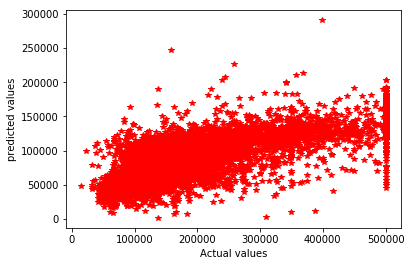

In [40]:
predictions=[]
for pred in estimator.predict(input_fn=test_input_func):
    predictions.append(np.array(pred['predictions']).astype(float))
plt.plot(y_test, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')

We can check the RMSE

In [42]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, predictions))**0.5

385.534234230045